## BoomBikes Sharing Assignment using Multiple Linear Regression Technique

# Step 1:Reading and understanding the Data

In [2]:
#Importing important libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statsmodels
import sklearn

In [3]:
#Reading the csv file and inspect the data
Bikeshare= pd.read_csv("day.csv")

In [4]:
Bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
Bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
Bikeshare.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Step 2: Data Preparation & Visualizing

Dealing with the variables :
As per Data dictionary,
'instant' is record index, So, we can drop it
'dteday; is date, So, we can drop it
'cnt' is count of total rental bikes including both casual and registered So, we can drop casual and registered variables

In [7]:
Bikeshare.drop(['instant', 'dteday','casual', 'registered'], axis=1, inplace=True)
Bikeshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
Bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### Renaming & Replacing the variables

For an easy readability let's rename the columns yr as year, mnth as month, temp as temperature, hum as humidity and cnt as count

In [12]:
Bikeshare.rename(columns={'yr':'year','mnth':'month','temp': 'temperature','hum':'humidity','cnt':'count'}, inplace = True) 
Bikeshare.head()

,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


Mapping the season and weathersit column according the data dictionary

In [13]:
Bikeshare['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
Bikeshare['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)
Bikeshare.head()

,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,count
0,spring,0,1,0,1,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
#For a clear understanding let's replace values of month and weekday columns according to the actual readable values.
Bikeshare['month'].replace({1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"},inplace=True)
Bikeshare['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
Bikeshare.head(10)

,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,count
0,spring,0,January,0,Monday,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,January,0,Saturday,0,Clear_Few Clouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,January,0,Sunday,0,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,January,0,Monday,1,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,January,0,Tuesday,1,Clear_Few Clouds,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,January,0,Wednesday,1,Clear_Few Clouds,6.184153,7.54440,48.2917,14.958889,1321


## Visualising the data
Let’s move on to visualising the data. This will help us in interpreting the data well and identifying the variables that can turn out to be useful in building the model.

In [15]:
Bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       730 non-null    object 
 1   year         730 non-null    int64  
 2   month        730 non-null    object 
 3   holiday      730 non-null    int64  
 4   weekday      730 non-null    object 
 5   workingday   730 non-null    int64  
 6   weathersit   730 non-null    object 
 7   temperature  730 non-null    float64
 8   atemp        730 non-null    float64
 9   humidity     730 non-null    float64
 10  windspeed    730 non-null    float64
 11  count        730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


<Figure size 432x288 with 0 Axes>

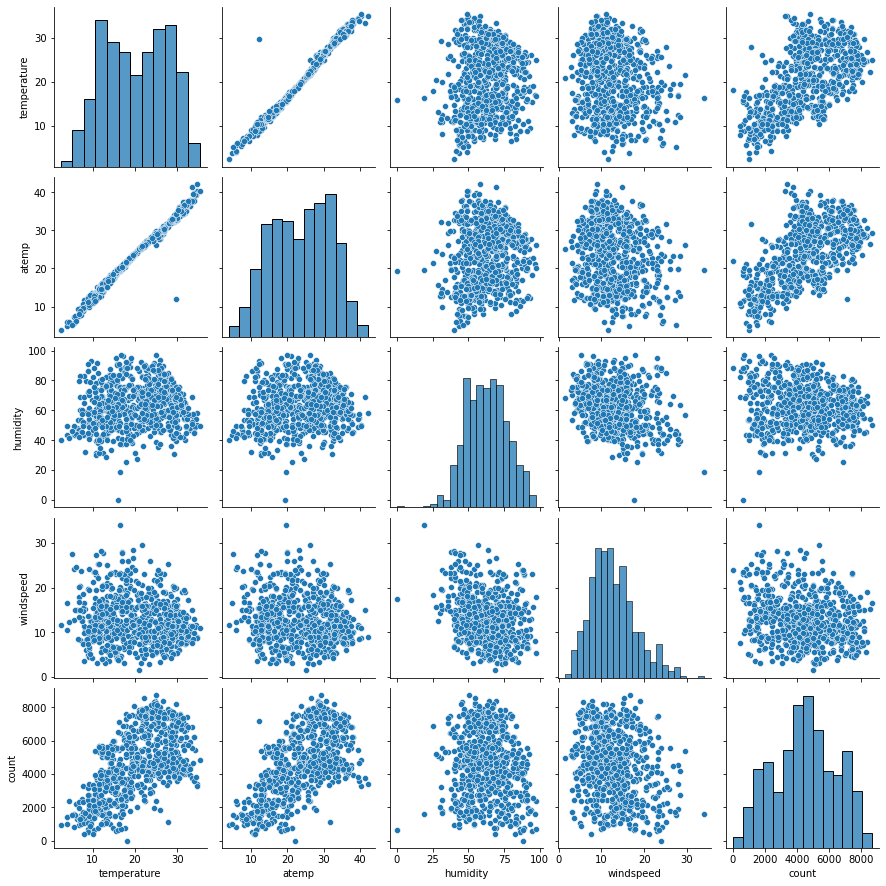

In [16]:
#Visualising the numeric value columns first. i.e temperature, atemp, humitidity, windspeed and count.
plt.figure()
sns.pairplot(data= Bikeshare,  vars=['temperature','atemp', 'humidity', 'windspeed', 'count']);

<AxesSubplot:>

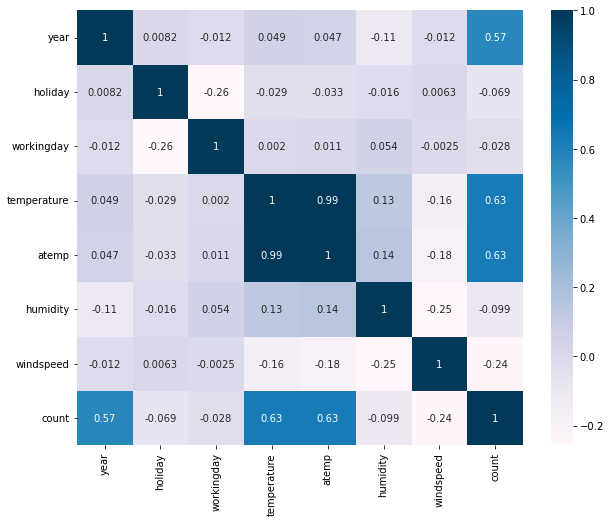

In [13]:
#Visualising the correlation among the variables.
plt.figure(figsize=(10,8))
sns.heatmap(Bikeshare.corr(), annot=True, cmap='PuBu')

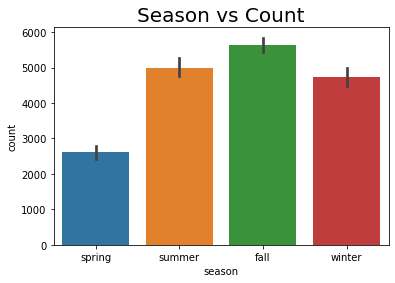

In [17]:
#Visualising other variables w.r.t the target variable count.
sns.barplot('season','count',data=Bikeshare)
plt.title('Season vs Count', fontsize=20);

We can clearly observe that the bikes were shared mostly in the fall season followed by summer, winter and the least in spring.

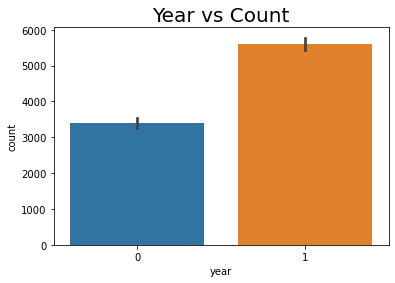

In [19]:
sns.barplot('year','count',data=Bikeshare)
plt.title('Year vs Count', fontsize=20);

Year 2019 i.e 1 recorded the more numbers of bike sharing compared to that in year 2018 i.e 0.

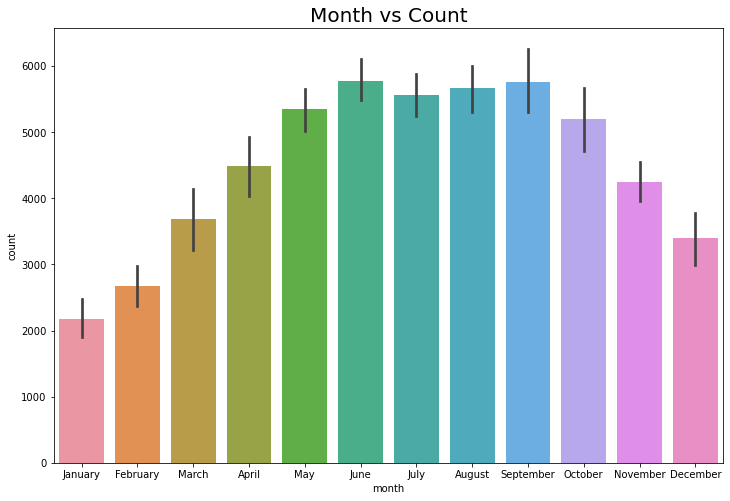

In [20]:
plt.figure(figsize=(12,8))
sns.barplot('month','count',data=Bikeshare)
plt.title('Month vs Count', fontsize=20);

Months from May to October recorded highest bike sharings.

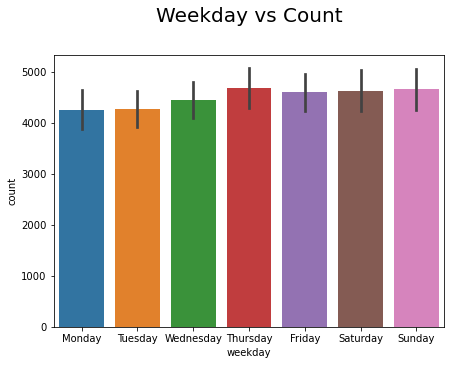

In [21]:
plt.figure(figsize=(7,5))
sns.barplot('weekday','count',data=Bikeshare)
plt.title('Weekday vs Count', fontsize=20, y=1.1);

According to the above visualisation it seems that the distribution of bike sharing was almost uniform in terms of weekdays.

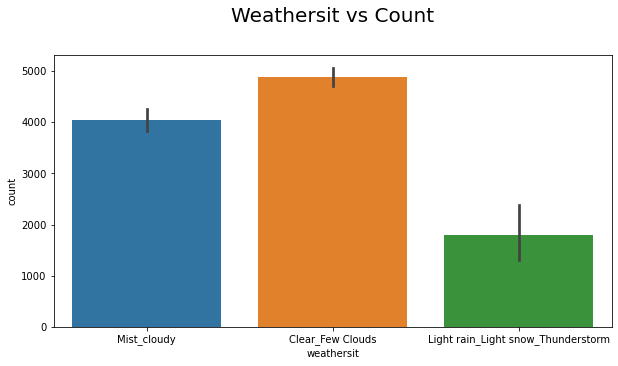

In [22]:
plt.figure(figsize=(10,5))
sns.barplot('weathersit','count',data=Bikeshare)
plt.title('Weathersit vs Count', fontsize=20, y=1.1);

Lowest bike sharing was recorded in the weather of Light rain/Light snow/Thunderstrorm, which is quite understandable.

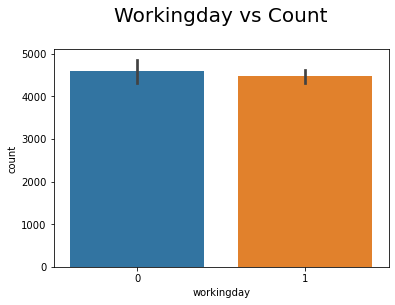

In [23]:
sns.barplot('workingday','count',data=Bikeshare)
plt.title('Workingday vs Count', fontsize=20, y=1.1);

There's no such significant difference between the number of bikes shared in workingdays.

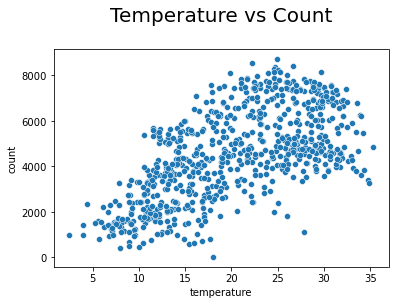

In [24]:
sns.scatterplot('temperature','count',data=Bikeshare)
plt.title('Temperature vs Count', fontsize=20, y=1.1);

Most of the data lies in the temperature between 15-35 celcius.

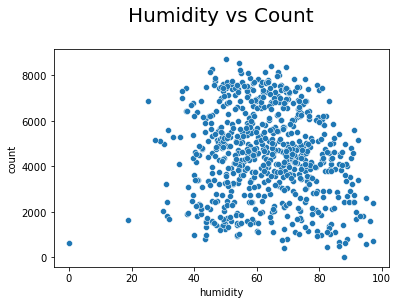

In [25]:
sns.scatterplot('humidity','count',data=Bikeshare)
plt.title('Humidity vs Count', fontsize=20, y=1.1);

Usully the bikes were shared in the High humidity days.

## Creating Dummy variables
A dummy variable is a binary variable that indicates whether a separate categorical variable takes on a specific value.

So, observing the dataset the variables for which we've to create dummy variables are:

season,weathersit

In [26]:
dummy_categories=Bikeshare[['season','weathersit','month','weekday']]

In [27]:
dummy_categories= pd.get_dummies(dummy_categories,drop_first=True )

In [28]:
dummy_categories.head()

,season_spring,season_summer,season_winter,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy,month_August,month_December,month_February,month_January,month_July,...,month_May,month_November,month_October,month_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
dummy_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   season_spring                                  730 non-null    uint8
 1   season_summer                                  730 non-null    uint8
 2   season_winter                                  730 non-null    uint8
 3   weathersit_Light rain_Light snow_Thunderstorm  730 non-null    uint8
 4   weathersit_Mist_cloudy                         730 non-null    uint8
 5   month_August                                   730 non-null    uint8
 6   month_December                                 730 non-null    uint8
 7   month_February                                 730 non-null    uint8
 8   month_January                                  730 non-null    uint8
 9   month_July                                     730 non-null    uint8
 10  mo

In [29]:
Bikeshare.drop(Bikeshare[['season','weathersit','weekday','month']],axis=1,inplace=True)

In [30]:
Bikeshare.head()

,year,holiday,workingday,temperature,atemp,humidity,windspeed,count
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [31]:
#Concatting both the dummy variables with the original dataset to move ahead.
Bikeshare= pd.concat([dummy_categories,Bikeshare],axis = 1)

In [32]:
Bikeshare.head()

,season_spring,season_summer,season_winter,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy,month_August,month_December,month_February,month_January,month_July,...,weekday_Tuesday,weekday_Wednesday,year,holiday,workingday,temperature,atemp,humidity,windspeed,count
0,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,1,0,0,0,1,0,...,1,0,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [31]:
Bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   season_spring                                  730 non-null    uint8  
 1   season_summer                                  730 non-null    uint8  
 2   season_winter                                  730 non-null    uint8  
 3   weathersit_Light rain_Light snow_Thunderstorm  730 non-null    uint8  
 4   weathersit_Mist_cloudy                         730 non-null    uint8  
 5   month_August                                   730 non-null    uint8  
 6   month_December                                 730 non-null    uint8  
 7   month_February                                 730 non-null    uint8  
 8   month_January                                  730 non-null    uint8  
 9   month_July                                     730 non

## Splitting the train-test data:
Importing train_test_split from sklearn

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
#splitting the train and test sets
Bikeshare_train, Bikeshare_test = train_test_split(Bikeshare, train_size = 0.7, random_state = 100)

In [35]:
#looking at the train set :Bikeshare_train
Bikeshare_train.head()

,season_spring,season_summer,season_winter,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy,month_August,month_December,month_February,month_January,month_July,...,weekday_Tuesday,weekday_Wednesday,year,holiday,workingday,temperature,atemp,humidity,windspeed,count
576,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,1,29.246653,33.1448,70.4167,11.083475,7216
426,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,16.980847,20.6746,62.1250,10.792293,4066
728,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,10.489153,11.5850,48.3333,23.500518,1796
482,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,15.443347,18.8752,48.9583,8.708325,4220
111,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,13.803347,16.0977,72.9583,14.707907,1683


In [36]:
Bikeshare_train.shape

(510, 30)

In [37]:
#looking at the test set : Bikeshare_test
Bikeshare_test.head()


,season_spring,season_summer,season_winter,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy,month_August,month_December,month_February,month_January,month_July,...,weekday_Tuesday,weekday_Wednesday,year,holiday,workingday,temperature,atemp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,1,...,0,1,0,1,0,29.793347,33.27085,63.7917,5.459106,6043
535,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,32.082500,36.04875,59.2083,7.625404,6211
299,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,19.270000,22.85230,81.2917,13.250121,2659
221,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,31.433347,34.24915,42.4167,13.417286,4780
152,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,29.315000,32.19710,30.5000,19.583229,4968


In [38]:
Bikeshare_test.shape

(220, 30)

# Rescaling some features
Importing library for scaling the dataset

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [40]:
#creating a new dataset with numeric variables that are to be scaled.
numeric_vars=['temperature', 'windspeed', 'atemp', 'humidity', 'count']

In [41]:
Bikeshare_train[numeric_vars]=scaler.fit_transform(Bikeshare_train[numeric_vars])

In [42]:
Bikeshare_train.head()

,season_spring,season_summer,season_winter,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy,month_August,month_December,month_February,month_January,month_July,...,weekday_Tuesday,weekday_Wednesday,year,holiday,workingday,temperature,atemp,humidity,windspeed,count
576,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973
111,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095


In [43]:
Bikeshare_train.describe()

,season_spring,season_summer,season_winter,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy,month_August,month_December,month_February,month_January,month_July,...,weekday_Tuesday,weekday_Wednesday,year,holiday,workingday,temperature,atemp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.247059,0.247059,0.029412,0.345098,0.096078,0.084314,0.066667,0.088235,0.076471,...,0.152941,0.135294,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.429398,0.431725,0.431725,0.169124,0.475867,0.294988,0.278131,0.249689,0.283915,0.266010,...,0.360284,0.342373,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking the correlation among the variables in the Bikeshare_train

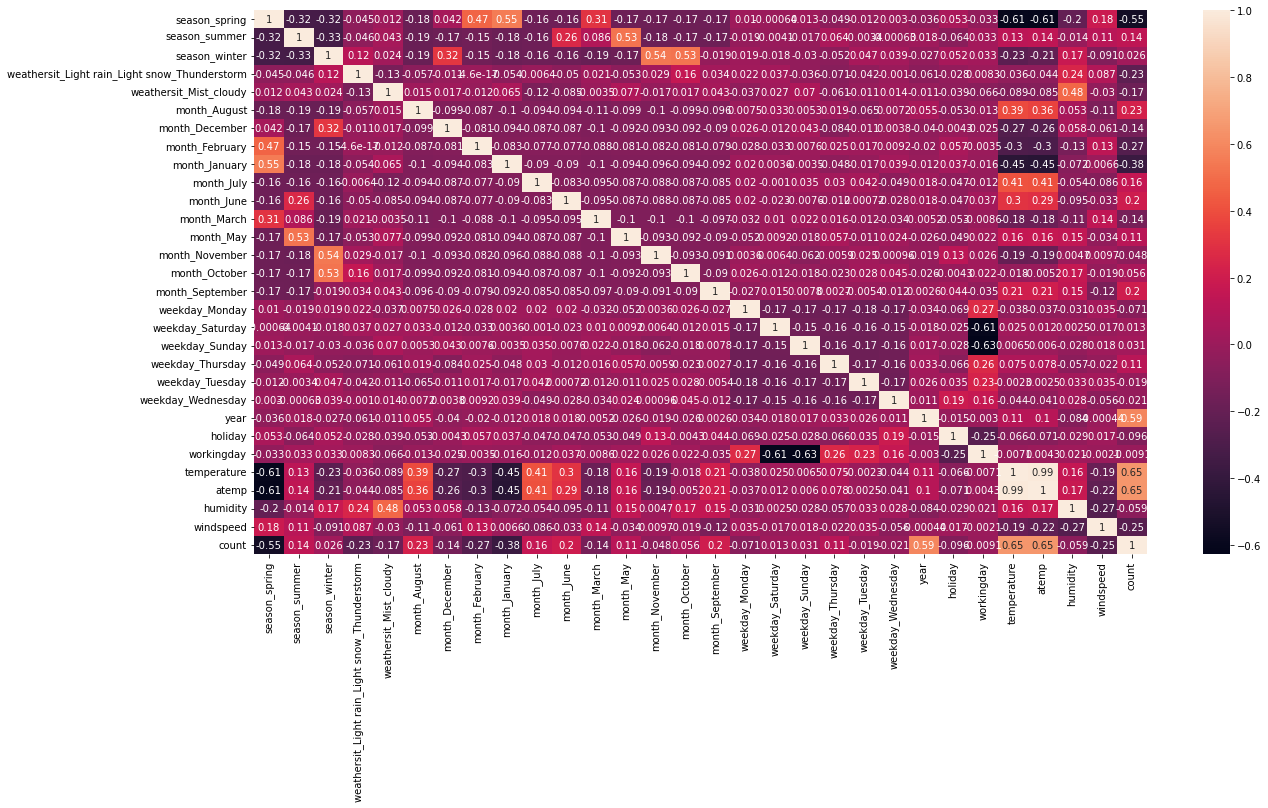

In [44]:
plt.figure(figsize=(20,10))
sns.heatmap(Bikeshare_train.corr(), annot=True);

Splitting the Bikeshare_train dataset into x_train and y_train to build a model ahead.

In [45]:
#creating x_train & y_train
X_train = Bikeshare_train
y_train = Bikeshare_train.pop('count')

In [45]:
X_train.head()

,season_spring,season_summer,season_winter,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy,month_August,month_December,month_February,month_January,month_July,...,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,year,holiday,workingday,temperature,atemp,humidity,windspeed
576,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,1,0.815169,0.766351,0.725633,0.264686
426,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0.442393,0.438975,0.640189,0.255342
728,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0.245101,0.200348,0.498067,0.663106
482,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0.395666,0.391735,0.504508,0.188475
111,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0.345824,0.318819,0.751824,0.380981


In [46]:
X_train.shape

(510, 29)

In [47]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: count, dtype: float64

# Step 3: Building the model
This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

RFE
Recursive feature elimination

In [48]:
#Beginning with the RFE method of feature selection.
## Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [49]:
#Selecting 50% variables to proceed with the RFE i.e 15
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [50]:
#variables selected by RFE :
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weathersit_Light rain_Light snow_Thunderstorm', True, 1),
 ('weathersit_Mist_cloudy', True, 1),
 ('month_August', False, 10),
 ('month_December', True, 1),
 ('month_February', False, 2),
 ('month_January', True, 1),
 ('month_July', True, 1),
 ('month_June', False, 12),
 ('month_March', False, 15),
 ('month_May', False, 9),
 ('month_November', True, 1),
 ('month_October', False, 13),
 ('month_September', True, 1),
 ('weekday_Monday', False, 8),
 ('weekday_Saturday', False, 5),
 ('weekday_Sunday', False, 6),
 ('weekday_Thursday', False, 14),
 ('weekday_Tuesday', False, 7),
 ('weekday_Wednesday', False, 11),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temperature', True, 1),
 ('atemp', False, 3),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [50]:
#Selected columns  by RFE:
cols=X_train.columns[rfe.support_]
cols

Index(['season_spring', 'season_summer', 'season_winter',
       'weathersit_Light rain_Light snow_Thunderstorm',
       'weathersit_Mist_cloudy', 'month_December', 'month_January',
       'month_July', 'month_November', 'month_September', 'year', 'holiday',
       'temperature', 'humidity', 'windspeed'],
      dtype='object')

In [51]:
#columns that aren't selected by the RFE:
X_train.columns[~rfe.support_]

Index(['month_August', 'month_February', 'month_June', 'month_March',
       'month_May', 'month_October', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'workingday', 'atemp'],
      dtype='object')

Proceeding with a new dataframe of columns that are selected by the RFE

In [52]:
#Creating X_train_RFE dataframe which consists of the features/columns selected by the RFE
X_train_RFE=X_train[cols]

In [53]:
X_train_RFE.shape

(510, 15)

In [54]:
#Import few important libraries to move ahead.
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

For a smooth track, let's define functions for creating models and calculating the VIFs using statsmodel.api.

Model building function

In [55]:
def model_build(cols):
    X_train_sm = sm.add_constant(X_train_RFE)
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

VIF calculating function

In [58]:
#Model 1:
model_build(X_train_RFE)
calculated_vif(X_train_RFE)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          8.15e-189
Time:                        22:18:06   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

We can see that humidity has a high VIF for which it could be dropped to build a further model.

In [57]:
# Model 2: dropping humidity because of high VIF in the above model and building another model
X_train_RFE=X_train_RFE.drop(['humidity'], axis=1)
model_build(X_train_RFE)
calculated_vif(X_train_RFE)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          4.75e-186
Time:                        22:33:28   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [58]:
#Model 3: dropping windspeed because of highly negative coefficientt in the above model and building another model
X_train_RFE=X_train_RFE.drop(['windspeed'], axis=1)
model_build(X_train_RFE)
calculated_vif(X_train_RFE)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     181.6
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          5.35e-179
Time:                        22:33:37   Log-Likelihood:                 485.33
No. Observations:                 510   AIC:                            -942.7
Df Residuals:                     496   BIC:                            -883.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [60]:
X_train_RFE=X_train_RFE.drop(['season_summer'], axis=1)
model_build(X_train_RFE)
calculated_vif(X_train_RFE)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     195.8
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          1.47e-179
Time:                        22:34:33   Log-Likelihood:                 483.91
No. Observations:                 510   AIC:                            -941.8
Df Residuals:                     497   BIC:                            -886.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [61]:
#dropping month_January because of high p-value in the above model and building another model
X_train_RFE=X_train_RFE.drop(['month_January'], axis=1)
model_build(X_train_RFE)
calculated_vif(X_train_RFE)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     211.9
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          7.70e-180
Time:                        22:35:16   Log-Likelihood:                 481.80
No. Observations:                 510   AIC:                            -939.6
Df Residuals:                     498   BIC:                            -888.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [62]:
#dropping month_December because of high p-value in the above model and building another model
X_train_RFE=X_train_RFE.drop(['month_December'], axis=1)
model_build(X_train_RFE)
calculated_vif(X_train_RFE)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     231.8
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          2.18e-180
Time:                        22:35:56   Log-Likelihood:                 480.27
No. Observations:                 510   AIC:                            -938.5
Df Residuals:                     499   BIC:                            -892.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [64]:
#dropping month_November because of high p-value in the above model and building another model
X_train_RFE=X_train_RFE.drop(['month_November'], axis=1)
model_build(X_train_RFE)
calculated_vif(X_train_RFE)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     213.2
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          6.16e-156
Time:                        22:39:05   Log-Likelihood:                 416.99
No. Observations:                 510   AIC:                            -816.0
Df Residuals:                     501   BIC:                            -777.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In the above model VIFand p-value are seems to be almost in the acceptable range. The difference between the R square and Adj. R Square is also negligibile.So, we can take a call and make it our final model for the given problem.

# Building the final fit model

In [65]:
def build_final_model(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [66]:
lr = build_final_model(X_train_RFE,y_train)

# Residual Analysis

In [67]:
y_train_pred = lr.predict(X_train_RFE)

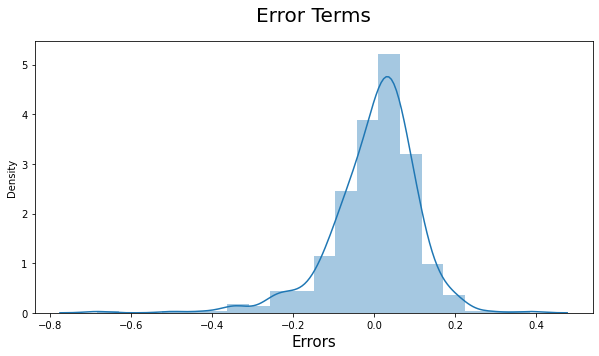

In [68]:
#Plotting the error terms
plt.figure(figsize=(10,5))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20, y=1.05)                  
plt.xlabel('Errors', fontsize = 15);

Error terms are normally distributed with a mean 0. So, it seems to be fine.

# Predicting the model further:

In [69]:
num_vars=['temperature','humidity','windspeed','count', 'atemp']

#scaling the test sets
Bikeshare_test[num_vars] = scaler.transform(Bikeshare_test[num_vars])
Bikeshare_test.head()

,season_spring,season_summer,season_winter,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy,month_August,month_December,month_February,month_January,month_July,...,weekday_Tuesday,weekday_Wednesday,year,holiday,workingday,temperature,atemp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,1,...,0,1,0,1,0,0.831783,0.001297,1.955914,0.039527,62.272198
535,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0.901354,0.001616,1.808848,0.096398,64.003413
299,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0.511964,0.000098,2.517430,0.244062,27.400592
221,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0.881625,0.001409,1.270063,0.248450,49.257175
152,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.817246,0.001173,0.887696,0.410323,51.194486


Splitting the test set into X_test and y_test

In [70]:
#Dividing into X_test and y_test
y_test = Bikeshare_test.pop('count')
X_test = Bikeshare_test

In [71]:
#taking the columns from our final model
cols = ['temperature', 'year', 
        'month_July', 'weathersit_Mist_cloudy', 'season_winter',
       'season_spring', 'month_September', 'holiday']

#Predict the values for test data
lr1 = build_final_model(X_test[cols],y_test)
y_test_pred = lr1.predict(X_test[cols])

# Getting R^2 for test & train set

In [72]:
#importing the libraries
from sklearn.metrics import r2_score

In [73]:
r2_score(y_test,y_test_pred)

0.7874210974953115

In [ ]:
r2_score(y_test,y_test_pred)

In [74]:
r2_score(y_train,y_train_pred)

0.7729774501495716

# Evaluating the model

Text(0, 0.5, 'y_test_pred')

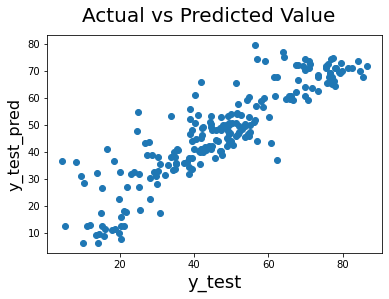

In [75]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('Actual vs Predicted Value', fontsize = 20)             
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_test_pred', fontsize = 16)

In [76]:
model_build(X_train_RFE)
calculated_vif(X_train_RFE)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     213.2
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          6.16e-156
Time:                        23:36:14   Log-Likelihood:                 416.99
No. Observations:                 510   AIC:                            -816.0
Df Residuals:                     501   BIC:                            -777.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

We can see that the equation of our best fitted line is: count= 0.1730 +(0.4840 X temperature) + (0.2382 X year)-0.0723 X month_july - 0.0636 X weathersit_Mist_cloudy + (0.0422 X season_winter) -(0.1075 X season_spring) + (0.0557 X month_September) -0.0868 X holiday

Inferences :

1)The bike sharing business by the company Boom bikes is highly affected by the variable temperature.

2) The bikes were usually shared in the month of Septmeber followed by july. So, it's better to launch in those month of the year.

3) The bikes were usually less shared in holidays and when whether is weathersit_Mist_cloudy,also in season_spring.